In [ ]:
import numpy as np
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import time

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,GRU,Dropout
from sklearn.preprocessing import MinMaxScaler   #change this part to diffrent Methods asked in 11

In [ ]:
import pandas as pd
import datetime
import pandas_datareader as pdr
from pandas import Series,DataFrame
start=datetime.datetime(2014,9,20)
end=datetime.datetime(2021,5,20)
df=pdr.get_data_yahoo(['BTC-USD'],start=start,end=end)
df.drop('Adj Close', inplace=True, axis=1)

In [ ]:
# df

# Specify inputs

In [ ]:
seq=27   #Set from 24_28
tt=0

# Data & Preprocessing

In [ ]:
# list1=['Close','High','Low','Open','Volume']   #Change it:List of desired X Features
list1=['Close','Open','Low']   #Change it:List of desired X Features
df1=df[list1]
data=df1.values

In [ ]:
hh=len(list1)-1   #feature dimension

In [ ]:
training_data=data[:2000,:]
data_test=data[2000:,:]

In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
# training_data

In [ ]:
X_train = [] 
Y_train = []
for i in range(seq, training_data.shape[0]):
   X_train.append(training_data[i-seq:i,1:])
   Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
scaler = MinMaxScaler()
data_test = scaler.fit_transform(data_test)
# data_test
X_test = []
Y_test = []
for i in range (seq, data_test.shape[0]):
  X_test.append(data_test[i-seq:i,1:])
  Y_test.append(data_test[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
# X_test.shape,Y_test.shape

In [ ]:
X_train.shape

(1973, 27, 2)

In [ ]:
#Change the following blocks,RNN,GRU,LSTM Also the activation Function

# Build The Model

In [ ]:
model = Sequential() 
model.add(GRU(units = seq , activation = 'tanh', input_shape = (seq, hh)))    #return_sequences = True
model.add(Dense(10, activation="relu")) 
model.add(Dense(1))
model.compile(loss='MSE', optimizer='Adam')
model.summary()



# history= model.fit(X_train, Y_train, epochs = 20, batch_size =30, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 27)                810       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                280       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


# Fit the model on our data

In [ ]:
start=time.time()
history= model.fit(X_train, Y_train, epochs = 20, batch_size =30, validation_split=0.2)
print("The test results for loss is")
model.evaluate(X_test, Y_test, batch_size=10, verbose=1)
end=time.time()
tt=end-start
print('The fitting and evaluation time is:  ',tt,'Seconds')


Epoch 1/20
53/53 [==============================] - 4s 29ms/step - loss: 0.0215 - val_loss: 0.0010
Epoch 2/20
53/53 [==============================] - 1s 20ms/step - loss: 0.0041 - val_loss: 9.0642e-04
Epoch 3/20
53/53 [==============================] - 1s 20ms/step - loss: 0.0034 - val_loss: 9.8048e-04
Epoch 4/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0025 - val_loss: 7.1333e-04
Epoch 5/20
53/53 [==============================] - 1s 20ms/step - loss: 0.0022 - val_loss: 8.2640e-04
Epoch 6/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0018 - val_loss: 7.6804e-04
Epoch 7/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 8/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 9/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 10/20
53/53 [==============================] - 1s 20ms/step - loss: 0.0018 - val_lo

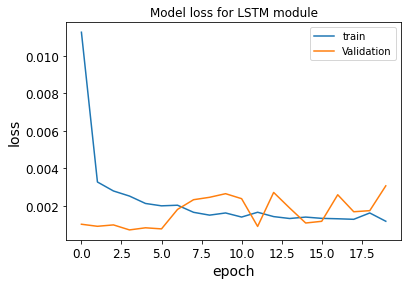

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for LSTM module')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim([0,0.005])
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
Y_pred = model.predict(X_test)
scale = 1/scaler.scale_[0]
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

In [ ]:
# Y_pred

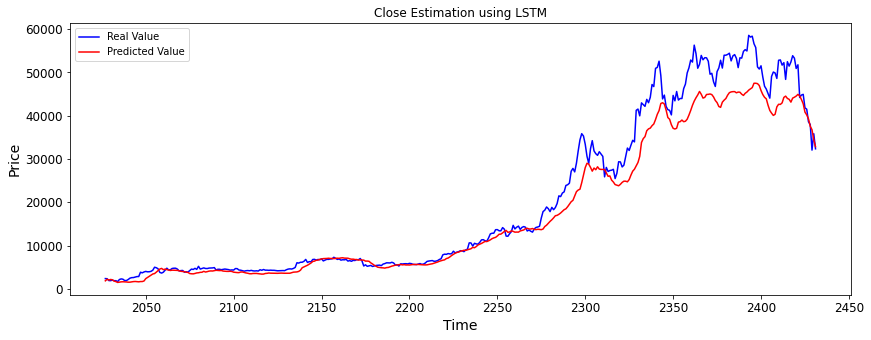

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(range(2000+seq,2000+Y_test.shape[0]+seq),Y_test, color = 'blue', label = 'Real Value')
plt.plot(range(2000+seq,2000+Y_test.shape[0]+seq),Y_pred, color = 'red', label = 'Predicted Value')
plt.title('Close Estimation using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
# plt.xlim([2350,2400])
# plt.ylim([40000,60000])
plt.legend()
plt.show()